## Import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = 80
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [ ]:
monday_working = pd.read_csv('../data/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
tuesday_working = pd.read_csv('../data/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
wednesday_working = pd.read_csv('../data/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
thursday_morning_webattacks = pd.read_csv('../data/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
thursday_afternoon_infilteration = pd.read_csv('../data/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
friday_morning = pd.read_csv('../data/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
friday_afternoon_portscan = pd.read_csv('../data/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
friday_afternoon_ddos = pd.read_csv('../data/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
datasets = [monday_working, tuesday_working, wednesday_working, thursday_morning_webattacks,
            thursday_afternoon_infilteration, friday_morning, friday_afternoon_portscan,
            friday_afternoon_ddos]

print(sum([e.shape[0] for e in datasets]))


2830743


In [ ]:
data = pd.concat(datasets)
data.shape

(2830743, 79)

In [ ]:
data.head(12)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,3.000000e+06,5.000000e+05,4.000000,0.000000,4,4,4,4.000000,0.000000,4,4,0,0.000000,0.000000,0,0,0,0,0,0,40,0,5.000000e+05,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,4.000000e+06,6.666667e+05,3.000000,0.000000,3,3,3,3.000000,0.000000,3,3,0,0.000000,0.000000,0,0,0,0,0,0,40,0,6.666667e+05,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,49486,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,49486,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,49486,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,88,609,7,4,484,414,233,0,69.142857,111.967895,207,0,103.5,119.511506,1.

In [ ]:
data[" Label"].value_counts()


 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
data.describe(include="number")

/Users/hugo/Documents/Projets_Code/CYB_Travail_Session/.venv/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/hugo/Documents/Projets_Code/CYB_Travail_Session/.venv/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

In [ ]:
data.describe(exclude="number")

,Label
count,2830743
unique,15
top,BENIGN
freq,2273097


**Toutes les variables sont numériques**

## Pretraitement

In [ ]:
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace = True)
data.dropna(inplace = True)
data.shape

(2520798, 79)

In [ ]:
data.loc[data["Label"] != "BENIGN", "Label"] = 1
data.loc[data["Label"] == "BENIGN", "Label"] = 0

In [ ]:
data["Label"].value_counts()

Label
0    2095057
1     425741
Name: count, dtype: int64

<Axes: >

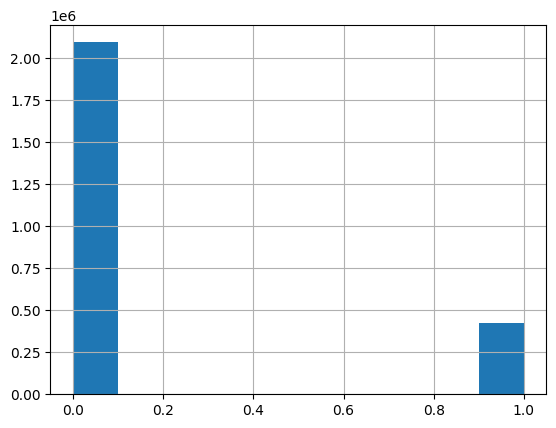

In [ ]:
data["Label"].hist()

In [ ]:
data = data.loc[:, data.nunique() > 1]

In [ ]:
data.shape

(2520798, 71)

In [ ]:
data.to_csv('../data/Data_binary.csv', index=False)

In [ ]:
#TODO: revenir imputer les NAN et les INF si les perfs sont pas bonnes

In [ ]:
test = pd.read_csv('../data/Data_binary.csv')